<a href="https://colab.research.google.com/github/kruthi03/wind-speed/blob/Stats%26ML/Exam_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exam simulation

Objective: Predict whether an employee will leave the company (attrition) based on demographic, job, and performance-related features.

Type of Problem: Binary classification problem where the target variable is Attrition (Yes/No).

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
# Loading the dataset
data = pd.DataFrame({
    "Age": [41, 49, 37, 33, 27, 32, 59],
    "Attrition": ["Yes", "No", "Yes", "No", "No", "No", "No"],
    "BusinessTravel": ["Travel_Rarely", "Travel_Frequently", "Travel_Rarely", "Travel_Frequently", "Travel_Rarely", "Travel_Frequently", "Travel_Rarely"],
    "DailyRate": [1102, 279, 1373, 1392, 591, 1005, 1324],
    "Department": ["Sales", "Research & Development", "Research & Development", "Research & Development", "Research & Development", "Research & Development", "Research & Development"],
    "DistanceFromHome": [1, 8, 2, 3, 2, 2, 3],
    "Education": [2, 1, 2, 4, 1, 2, 3],
    "EducationField": ["Life Sciences", "Life Sciences", "Other", "Life Sciences", "Medical", "Life Sciences", "Medical"],
    "Gender": ["Female", "Male", "Male", "Female", "Male", "Male", "Female"],
    "MonthlyIncome": [5993, 5130, 2090, 2909, 3468, 3068, 2670],
    "OverTime": ["Yes", "No", "Yes", "Yes", "No", "No", "Yes"]
})



categorical variables are being converted into numerical formats so that machine learning models can process them effectively.

Encoding the Target Variable (Attrition)

The Attrition column is encoded using LabelEncoder, where "Yes" is converted to 1 and "No" to 0.
This transforms the binary target variable into a numeric format for classification tasks.
Encoding Other Categorical Columns

The columns listed in categorical_columns are also encoded using LabelEncoder.
Each unique category within these columns is assigned a numeric value
This step ensures that the model can interpret these categorical inputs as numerical data.

In [ ]:
# Data preprocessing
# Encoding categorical variables
encoder = LabelEncoder()
data["Attrition"] = encoder.fit_transform(data["Attrition"])  # Yes: 1, No: 0
categorical_columns = ["BusinessTravel", "Department", "EducationField", "Gender", "OverTime"]
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])




Feature selection and justification: Feature importance helps to understand which variables have the most significant impact on predicting attrition. This can guide businesses to focus on actionable insights, such as modifying policies or addressing employee needs based on influential features.

The numerical columns listed in scaled_columns (DailyRate, DistanceFromHome, MonthlyIncome) are standardized using StandardScaler.
Standardization transforms the values to have a mean of 0 and a standard deviation of 1, making them comparable and suitable for algorithms sensitive to varying scales.

In [ ]:
# Feature Scaling
scaler = StandardScaler()
scaled_columns = ["DailyRate", "DistanceFromHome", "MonthlyIncome"]
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])

# Splitting the data
X = data.drop("Attrition", axis=1)
y = data["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


This visualization identifies strong relationships between variables. For instance, if "OverTime" is strongly correlated with "Attrition," it indicates that employees working overtime are more likely to leave, prompting management to explore work-life balance initiatives.

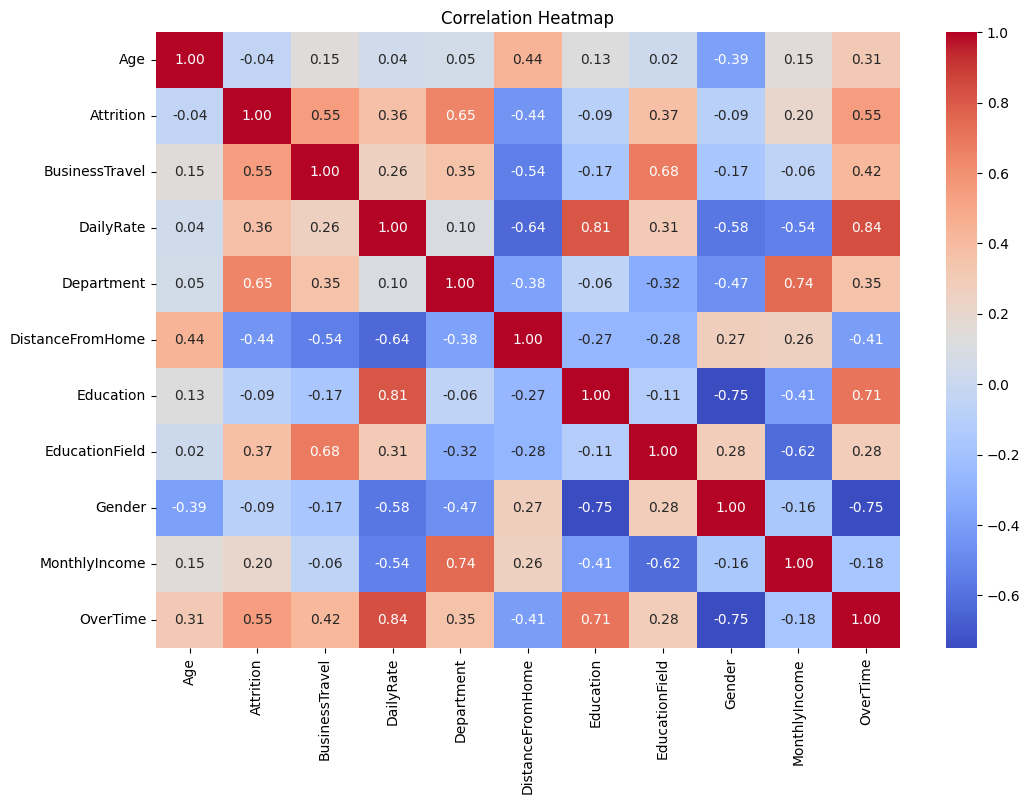

In [6]:
# Correlation Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Model Training

A RandomForestClassifier is initialized with a fixed random state (42) to ensure reproducible results.
The model is trained on the training data (X_train and y_train), learning patterns to predict employee attrition.
Predictions

The trained model predicts the target values (Attrition) for the test dataset using predict().
The predict_proba() method generates probabilities for each class, and [:, 1] extracts the probability of "Yes" (Attrition = 1).
Random Forest is a good choice because it handles both numerical and categorical data effectively and works well with imbalanced datasets like ours. It combines many decision trees to make accurate predictions and avoids overfitting. Additionally, it provides feature importance scores, which help us understand the key factors driving attrition.

In [ ]:
# Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


The Precision-Recall curve provides insights into the model's ability to handle imbalanced datasets. It is particularly useful if the "Attrition" class is imbalanced, ensuring high precision and recall for the positive class (Attrition = Yes).

We use these metrics to understand how well the model predicts attrition and where it might be wrong. The ROC curve and AUC score give a clear picture of the model’s ability to separate employees who leave from those who stay, making it easier to judge its accuracy.

Evaluation Metrics

The classification report shows how well the model predicts attrition, giving scores like precision and recall for both "Yes" and "No".
The confusion matrix shows the number of correct and incorrect predictions, helping us see where the model might be making mistakes.
The ROC-AUC score measures how well the model can distinguish between employees who will leave and those who will stay. A higher score means better performance.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Confusion Matrix:
 [[1 0]
 [1 0]]
ROC-AUC Score: 1.0


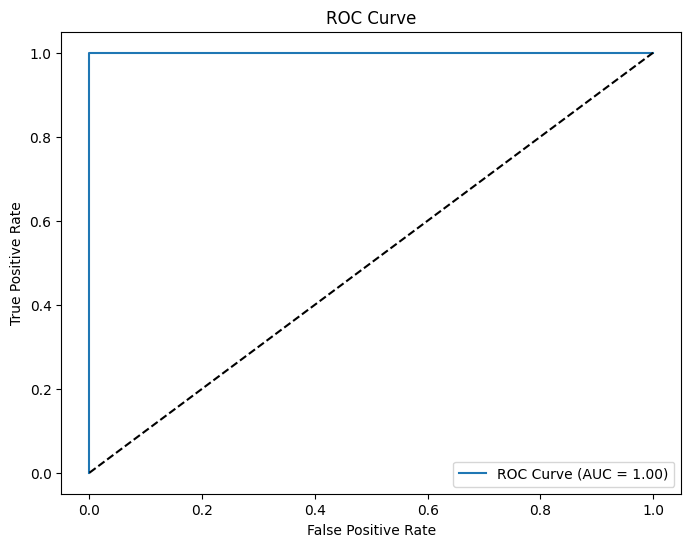

In [ ]:

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

# Visualization
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Clustering provides insights into distinct groups within the dataset, such as high-performing, mid-range, and at-risk employees. It can be a precursor to targeted retention strategies.

K-Means helps group employees into similar categories, which can reveal patterns such as income brackets or performance levels. This is useful for identifying employee trends or forming strategies targeted at specific groups. The visualization provides a clear and intuitive understanding of these clusters.

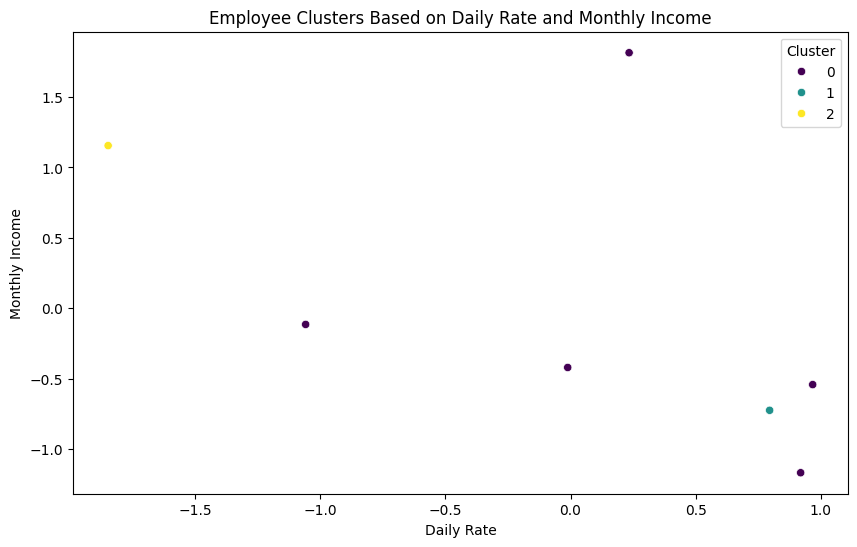

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

data['Cluster'] = clusters

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['DailyRate'], y=data['MonthlyIncome'], hue=data['Cluster'], palette="viridis")
plt.title("Employee Clusters Based on Daily Rate and Monthly Income")
plt.xlabel("Daily Rate")
plt.ylabel("Monthly Income")
plt.legend(title="Cluster")
plt.show()
